<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8D8D8;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Marketing Behavior Prediction <br>
    (EDA / Machine learning)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Marketing Behavior Prediction</div>**


## Goal
> ## EDA : Column Analysis, Column Correlation Analysis
> ## Modeling : Predicting Purchase_Likelihood

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# For model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/marketing-behavior-prediction-dataset/marketing_data.csv')
df.head()

,User_ID,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
0,1,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,...,0.570089,0.000000,0.000000,0.000000,0.000000,0.000000,0.593544,0.000000,0.000000,0.0
1,2,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,...,0.000000,0.563362,0.000000,0.000000,0.000000,0.000000,0.594854,0.000000,0.000000,0.0
2,3,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,...,0.000000,0.000000,0.491103,0.000000,0.000000,0.489434,0.000000,0.512291,0.000000,0.0
3,4,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,...,0.000000,0.000000,0.562483,0.000000,0.582526,0.000000,0.000000,0.586751,0.000000,0.0
4,5,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,...,0.516121,0.000000,0.000000,0.495195,0.000000,0.000000,0.000000,0.000000,0.473183,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 500 non-null    int64  
 1   Likes                   500 non-null    float64
 2   Shares                  500 non-null    float64
 3   Comments                500 non-null    float64
 4   Clicks                  500 non-null    float64
 5   Engagement_with_Ads     500 non-null    float64
 6   Time_Spent_on_Platform  500 non-null    float64
 7   Purchase_History        500 non-null    int64  
 8   Engagement_Level        500 non-null    object 
 9   Purchase_Likelihood     500 non-null    int64  
 10  brand                   500 non-null    float64
 11  buy                     500 non-null    float64
 12  coupon                  500 non-null    float64
 13  deal                    500 non-null    float64
 14  discount                500 non-null    fl

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,500.0,250.500000,144.481833,1.0,125.750000,250.500000,375.250000,500.000000
Likes,500.0,0.507096,0.293279,0.0,0.254016,0.494980,0.764056,1.000000
Shares,500.0,0.501698,0.298460,0.0,0.231156,0.489950,0.773869,1.000000
Comments,500.0,0.495660,0.275211,0.0,0.270000,0.500000,0.720000,1.000000
Clicks,500.0,0.508080,0.303279,0.0,0.260000,0.500000,0.800000,1.000000
Engagement_with_Ads,500.0,0.491000,0.295421,0.0,0.233333,0.466667,0.733333,1.000000
Time_Spent_on_Platform,500.0,0.492899,0.288483,0.0,0.253356,0.466443,0.733221,1.000000
Purchase_History,500.0,0.448000,0.497787,0.0,0.000000,0.000000,1.000000,1.000000
Purchase_Likelihood,500.0,0.502000,0.500497,0.0,0.000000,1.000000,1.000000,1.000000
brand,500.0,0.133896,0.254030,0.0,0.000000,0.000000,0.000000,1.000000


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [5]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
User_ID                   0.0
Likes                     0.0
Shares                    0.0
Comments                  0.0
Clicks                    0.0
Engagement_with_Ads       0.0
Time_Spent_on_Platform    0.0
Purchase_History          0.0
Engagement_Level          0.0
Purchase_Likelihood       0.0
brand                     0.0
buy                       0.0
coupon                    0.0
deal                      0.0
discount                  0.0
exclusive                 0.0
limited                   0.0
new                       0.0
offer                     0.0
product                   0.0
sale                      0.0
shopping                  0.0
dtype: float64

Duplicate Rows (%):
0.0


In [6]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,User_ID,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
0,1,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,...,0.570089,0.0,0.000000,0.000000,0.000000,0.000000,0.593544,0.000000,0.000000,0.000000
1,5,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,...,0.516121,0.0,0.000000,0.495195,0.000000,0.000000,0.000000,0.000000,0.473183,0.000000
2,8,0.608434,0.427136,0.84,0.92,0.633333,0.677852,1,High,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9,0.757028,0.180905,0.37,0.88,0.533333,0.248322,0,Medium,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.564613,0.000000,0.000000,0.000000,0.586727
4,10,0.724900,0.783920,0.98,0.82,0.100000,0.697987,1,Low,1,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.419743,0.379331,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,480,0.690763,0.748744,0.28,0.88,0.833333,0.832215,1,High,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.395544,0.000000,0.000000,0.000000,0.822071
1242,481,0.861446,0.778894,0.54,0.40,0.366667,0.114094,1,Medium,1,...,0.000000,0.0,0.000000,0.000000,0.594585,0.000000,0.000000,0.000000,0.541237,0.594585
1243,486,0.142570,1.000000,0.24,0.26,0.966667,0.020134,1,Low,0,...,0.000000,0.0,0.563878,0.000000,0.583970,0.000000,0.000000,0.000000,0.000000,0.583970
1244,488,0.267068,0.879397,0.30,0.16,0.966667,0.409396,1,Medium,1,...,0.000000,0.0,0.434777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900538


In [7]:
label_encoder = LabelEncoder()
df["Engagement_Level"] = label_encoder.fit_transform(df["Engagement_Level"])
df = df.apply(pd.to_numeric, errors="coerce")

print(df.dtypes)

User_ID                     int64
Likes                     float64
Shares                    float64
Comments                  float64
Clicks                    float64
Engagement_with_Ads       float64
Time_Spent_on_Platform    float64
Purchase_History            int64
Engagement_Level            int64
Purchase_Likelihood         int64
brand                     float64
buy                       float64
coupon                    float64
deal                      float64
discount                  float64
exclusive                 float64
limited                   float64
new                       float64
offer                     float64
product                   float64
sale                      float64
shopping                  float64
dtype: object


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

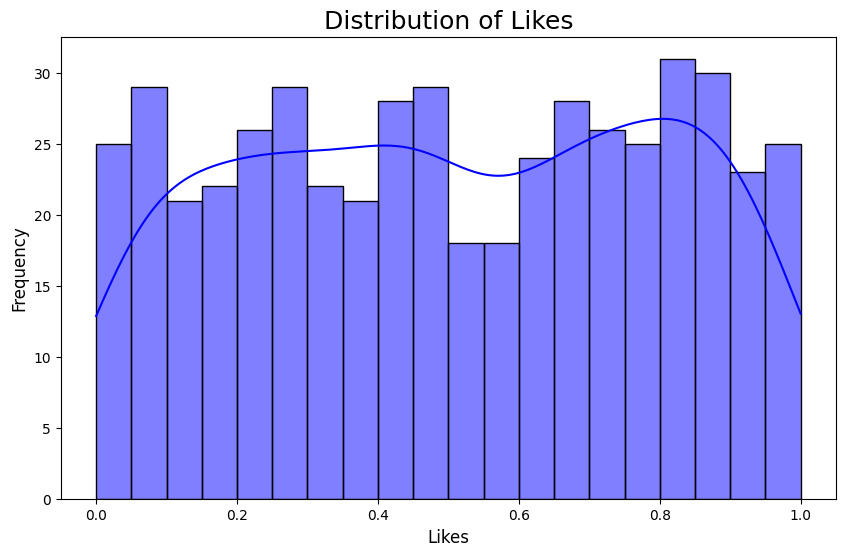

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Likes"], kde=True, bins=20, color="blue")
plt.title("Distribution of Likes", fontsize=18)
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

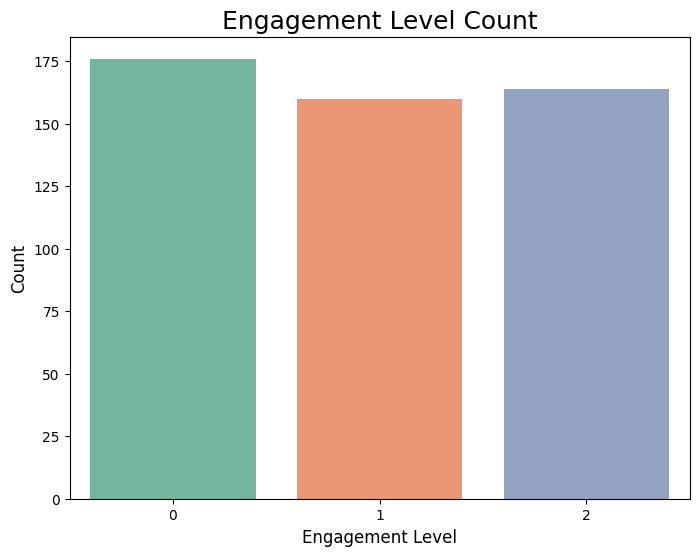

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Engagement_Level", data=df, palette="Set2")
plt.title("Engagement Level Count",fontsize=18)
plt.xlabel("Engagement Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

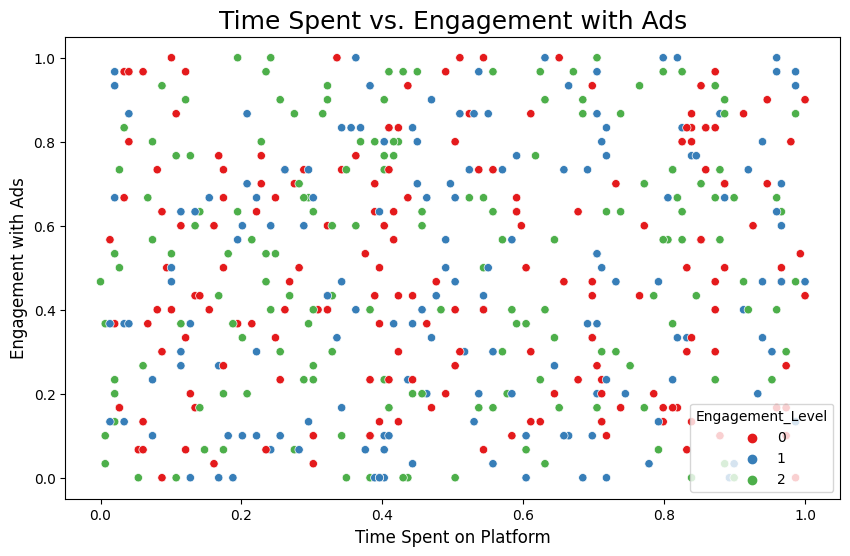

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Time_Spent_on_Platform", y="Engagement_with_Ads", hue="Engagement_Level", data=df, palette="Set1")
plt.title("Time Spent vs. Engagement with Ads", fontsize=18)
plt.xlabel("Time Spent on Platform", fontsize=12)
plt.ylabel("Engagement with Ads", fontsize=12)
plt.show()

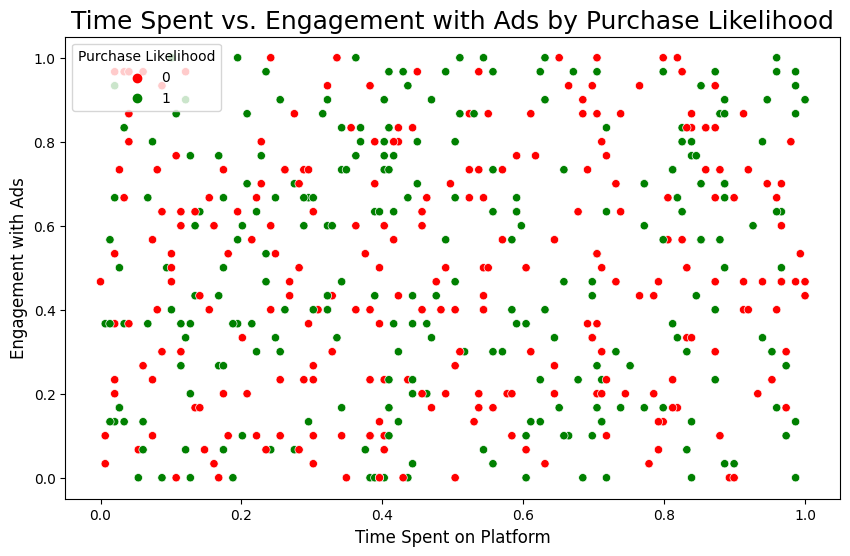

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Time_Spent_on_Platform",
    y="Engagement_with_Ads",
    hue="Purchase_Likelihood",
    data=df,
    palette={0: "red", 1: "green"}
)
plt.title("Time Spent vs. Engagement with Ads by Purchase Likelihood", fontsize=18)
plt.xlabel("Time Spent on Platform", fontsize=12)
plt.ylabel("Engagement with Ads", fontsize=12)
plt.legend(title="Purchase Likelihood", loc="upper left")
plt.show()

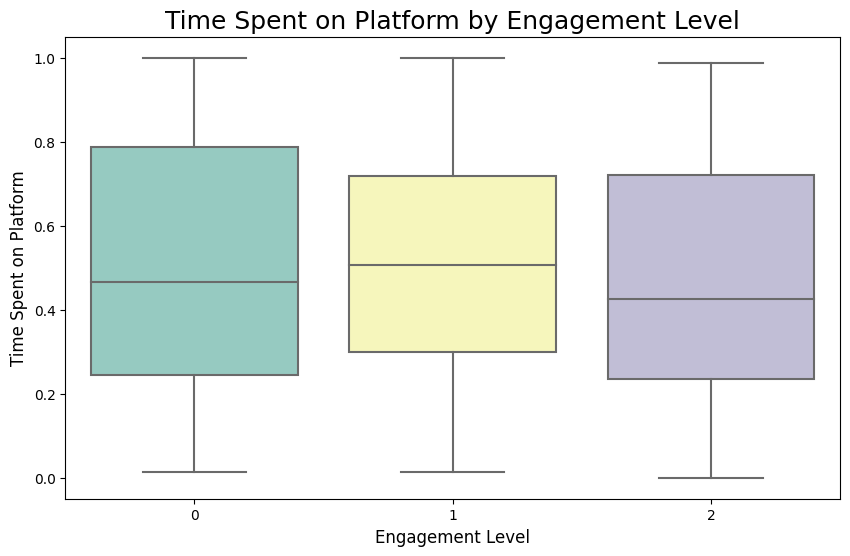

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Engagement_Level", y="Time_Spent_on_Platform", data=df, palette="Set3")
plt.title("Time Spent on Platform by Engagement Level", fontsize=18)
plt.xlabel("Engagement Level", fontsize=12)
plt.ylabel("Time Spent on Platform", fontsize=12)
plt.show()

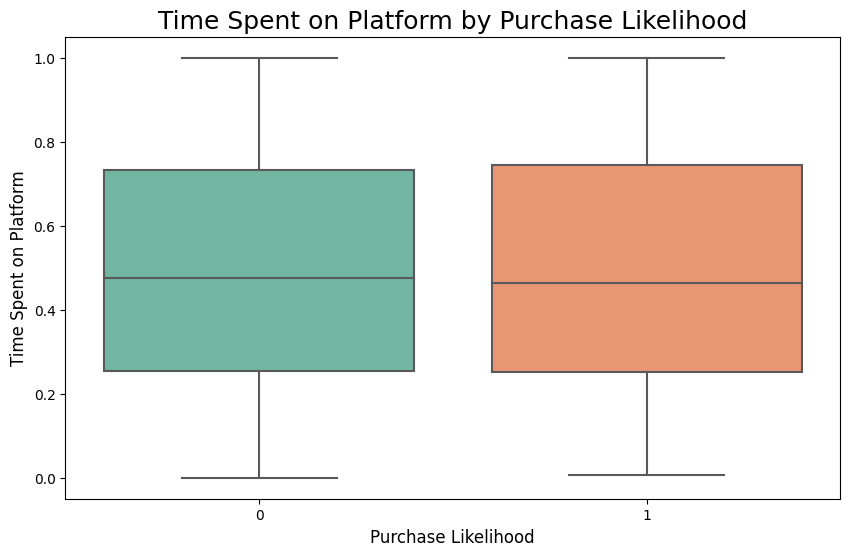

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Purchase_Likelihood", y="Time_Spent_on_Platform", data=df, palette="Set2")
plt.title("Time Spent on Platform by Purchase Likelihood", fontsize=18)
plt.xlabel("Purchase Likelihood",fontsize=12)
plt.ylabel("Time Spent on Platform", fontsize=12)
plt.show()

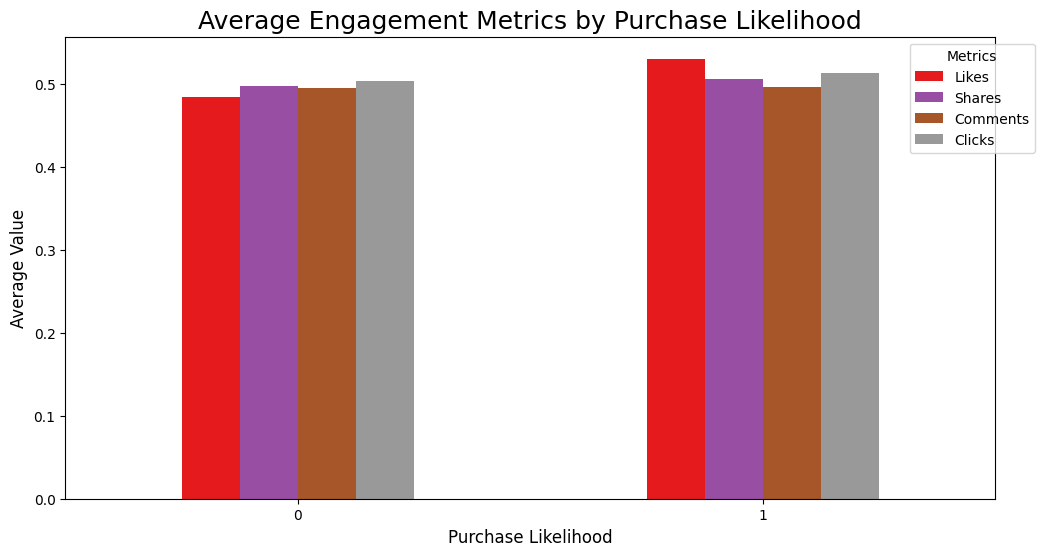

In [14]:
likelihood_means = df.groupby("Purchase_Likelihood")[["Likes", "Shares", "Comments", "Clicks"]].mean()

likelihood_means.plot(kind="bar", figsize=(12, 6), colormap="Set1")
plt.title("Average Engagement Metrics by Purchase Likelihood", fontsize=18)
plt.xlabel("Purchase Likelihood", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1))
plt.show()

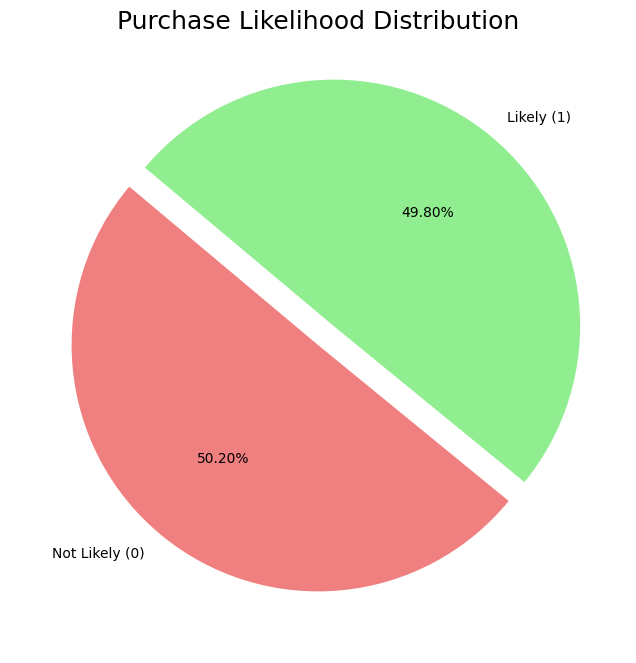

In [15]:
plt.figure(figsize=(8, 8))
df["Purchase_Likelihood"].value_counts().plot(
    kind="pie",
    autopct="%.2f%%",
    labels=["Not Likely (0)", "Likely (1)"],
    colors=["lightcoral", "lightgreen"],
    explode=(0, 0.1),
    startangle=140
)
plt.title("Purchase Likelihood Distribution", fontsize=18)
plt.ylabel("")
plt.show()

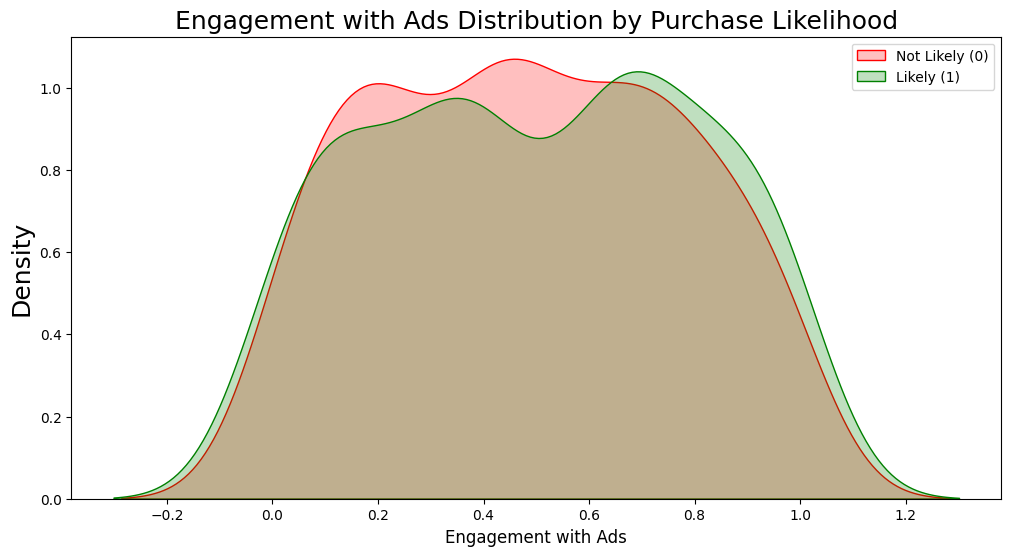

In [16]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df["Purchase_Likelihood"] == 0]["Engagement_with_Ads"], label="Not Likely (0)", fill=True, color="red")
sns.kdeplot(df[df["Purchase_Likelihood"] == 1]["Engagement_with_Ads"], label="Likely (1)", fill=True, color="green")
plt.title("Engagement with Ads Distribution by Purchase Likelihood", fontsize=18)
plt.xlabel("Engagement with Ads", fontsize=12)
plt.ylabel("Density",fontsize=18)
plt.legend()
plt.show()

In [17]:
from scipy.stats import ttest_ind

group_0 = df[df["Purchase_Likelihood"] == 0]["Time_Spent_on_Platform"]
group_1 = df[df["Purchase_Likelihood"] == 1]["Time_Spent_on_Platform"]

stat, p_value = ttest_ind(group_0, group_1)

print(f"T-test Results for Time Spent on Platform:")
print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")

T-test Results for Time Spent on Platform:
Statistic: -0.3452, P-value: 0.7301


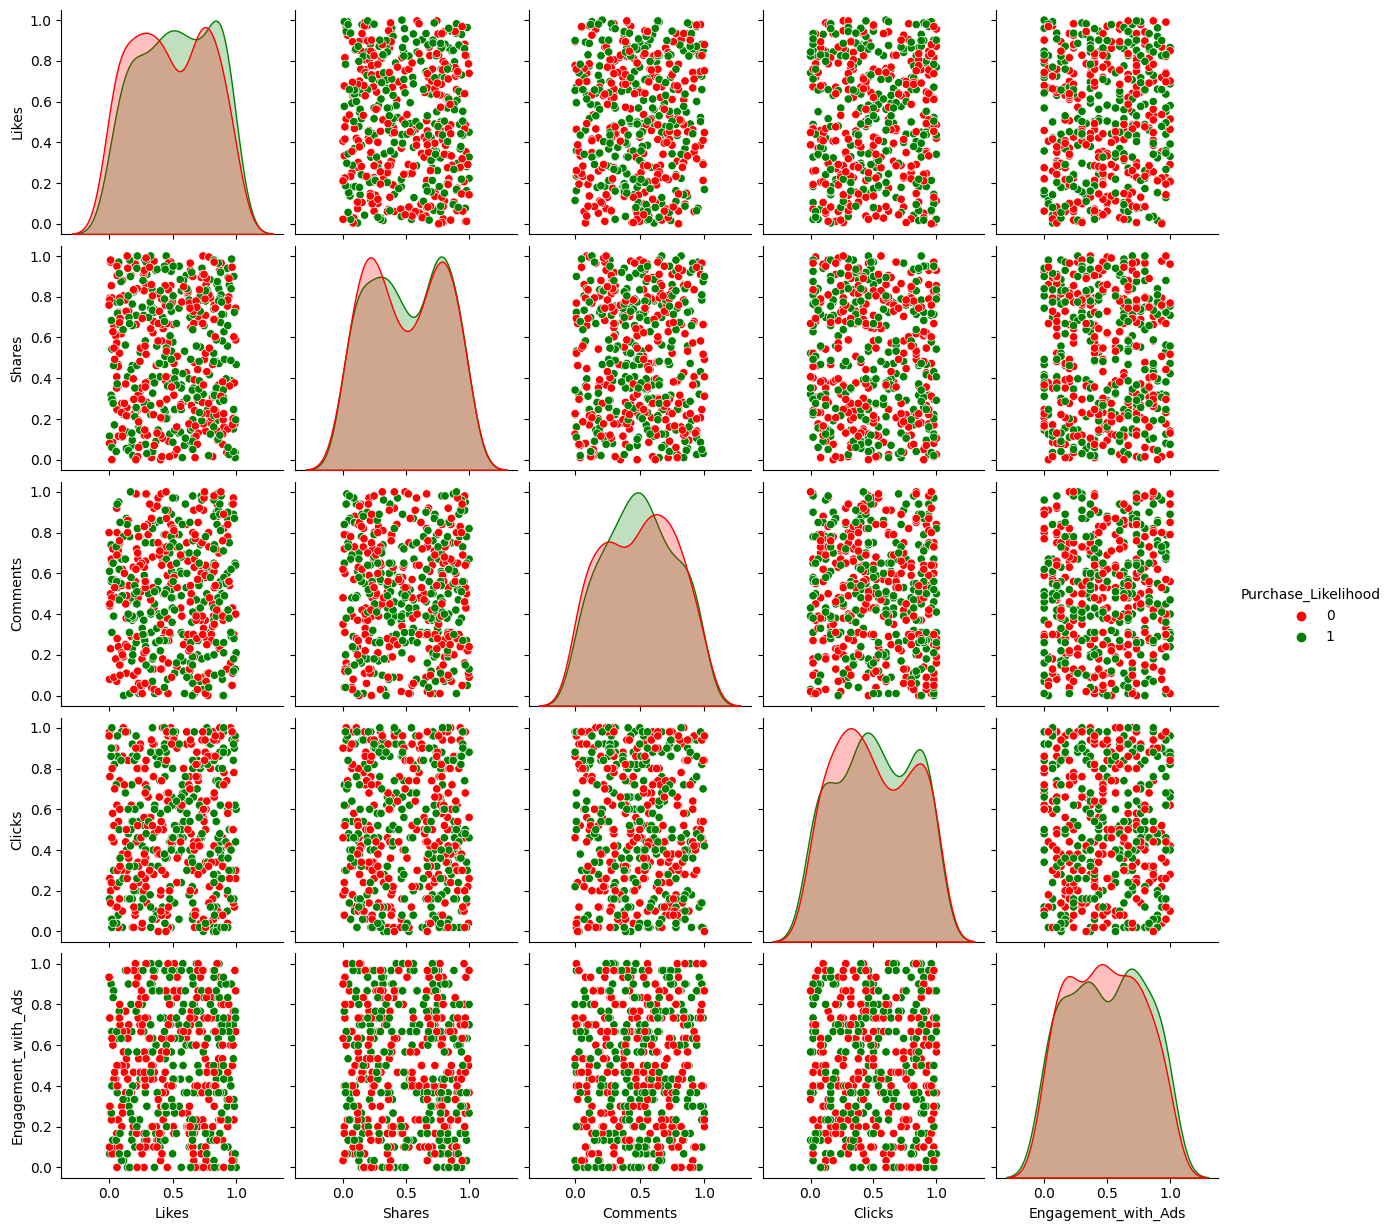

In [18]:
sns.pairplot(
    df,
    vars=["Likes", "Shares", "Comments", "Clicks", "Engagement_with_Ads"],
    hue="Purchase_Likelihood",
    palette={0: "red", 1: "green"}
)
plt.show()

In [19]:
df.drop('User_ID', axis=1,inplace=True)

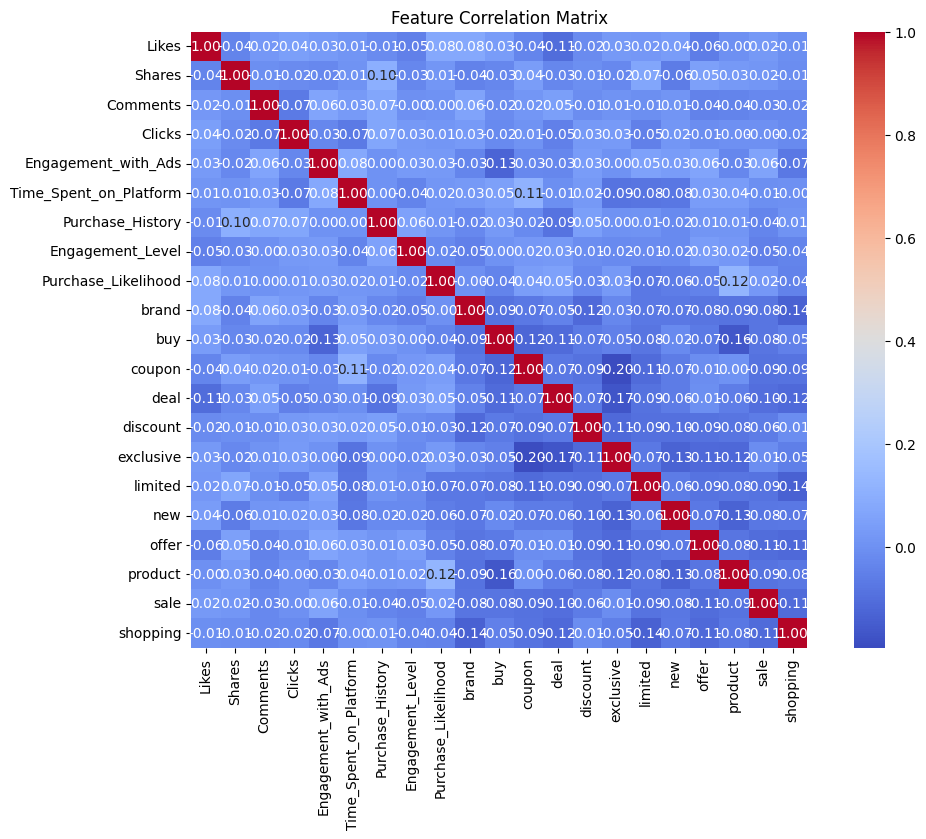

In [20]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True
)
plt.title("Feature Correlation Matrix")
plt.show()

### In my opinion, since the correlation between each variable is very low, the accuracy of the model is expected to be very low.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of classification model performance</div>

In [21]:
X = df.drop('Purchase_Likelihood', axis=1)
y = df['Purchase_Likelihood']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

In [22]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.55,0.552273,0.55,0.548421
1,SVM,0.57,0.569734,0.57,0.569353
2,KNN,0.53,0.529824,0.53,0.529859
3,Decision Tree,0.55,0.549840,0.55,0.549865
4,Random Forest,0.55,0.549638,0.55,0.549323
5,XGBoost,0.55,0.549713,0.55,0.547142
6,MLP Classifier,0.50,0.500400,0.50,0.500000



Best Model:
Model             SVM
Accuracy         0.57
Precision    0.569734
Recall           0.57
F1-Score     0.569353
Name: 1, dtype: object


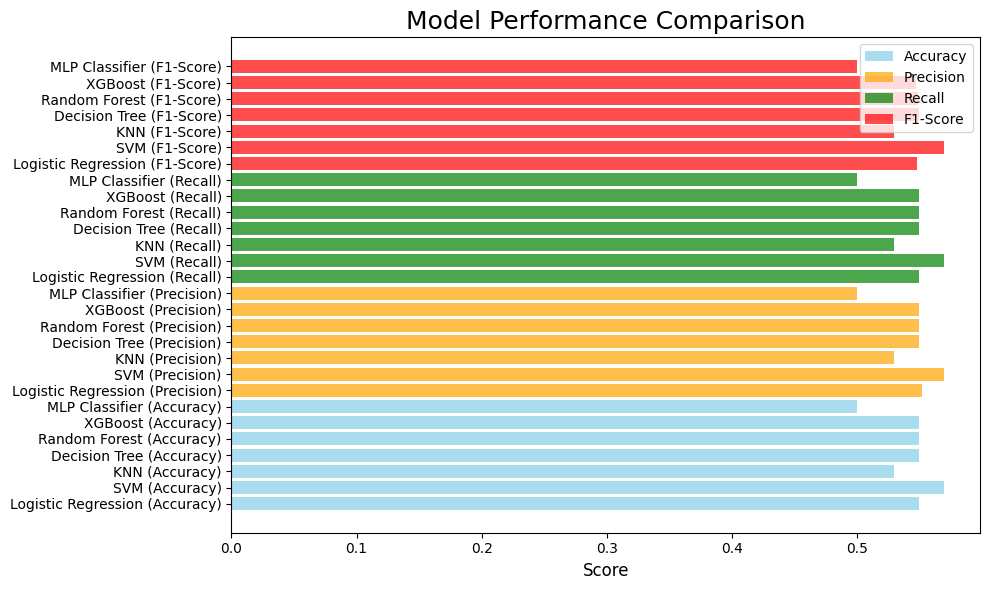


Optimal Model based on Accuracy: SVM with Accuracy = 0.5700


In [23]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Random Search for SVM</div>

In [24]:
svm = SVC(random_state=42)

param_distributions = {
    'C': np.logspace(-3, 3, 50),        
    'gamma': np.logspace(-4, 2, 50),    
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
    'degree': [2, 3, 4, 5],              
    'coef0': np.linspace(0, 10, 20)     
}

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_distributions,
    n_iter=100,  
    scoring='accuracy',  
    cv=5,  
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

best_svm = random_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'kernel': 'sigmoid', 'gamma': 10.481131341546853, 'degree': 4, 'coef0': 3.6842105263157894, 'C': 0.1206792640639329}
Best Cross-Validation Accuracy: 0.5375

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.51      0.48        49
           1       0.47      0.41      0.44        51

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.46      0.46      0.46       100



### The performance will only improve if we expand the range of parameter values of random search or do grid search.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Ensemble techniques : Voting model (soft)</div>

In [25]:
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)


models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": svm_model,  
}


results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

voting_clf = VotingClassifier(
    estimators=[
        ("Random Forest", models["Random Forest"]),
        ("AdaBoost", models["AdaBoost"]),
        ("XGBoost", models["XGBoost"]),
        ("SVM", models["SVM"]), 
    ],
    voting='soft'  
)

voting_clf.fit(X_train_scaled, y_train)

y_pred_voting = voting_clf.predict(X_test_scaled)
voting_acc = accuracy_score(y_test, y_pred_voting)
results["Voting Classifier"] = voting_acc
print("\nVoting Classifier Classification Report:\n")
print(classification_report(y_test, y_pred_voting))

print("\nModel Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.51      0.53        49
           1       0.56      0.59      0.57        51

    accuracy                           0.55       100
   macro avg       0.55      0.55      0.55       100
weighted avg       0.55      0.55      0.55       100


AdaBoost Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.51      0.52        49
           1       0.55      0.57      0.56        51

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.47      0.51        49
           1       0.55      0.63      0.59        51

    accuracy                           0.55       100
   macro avg       0.5

### Soft voting performs better than hard voting.

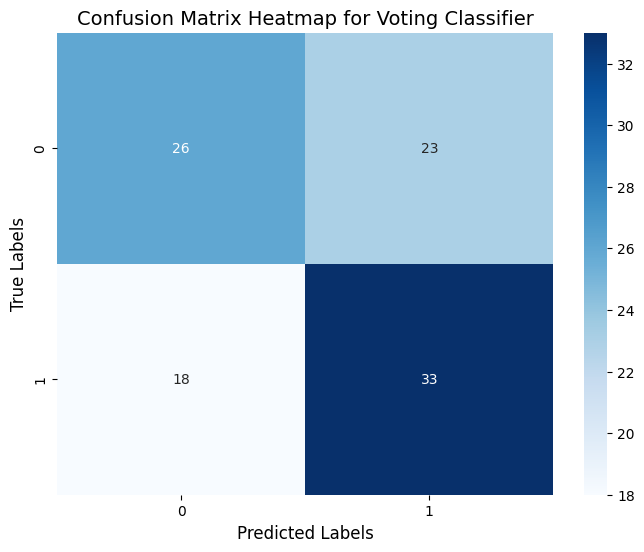

In [26]:
cm = confusion_matrix(y_test, y_pred_voting)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap for Voting Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>

### Finally, among the general machine learning classification models, SVM performed the best, and the voting model improved the performance.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Thanks !</div>

###  If you have any questions, please feel free to ask me a question and use the code freely ! 

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Address</div><br><br>

<a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
<a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a>
